# Universidad del Desarrollo
## Magister Data Science - Macroeconomía
### Grupo N°2: (Región de los Lagos)
* Jose Pedro
* Cristian
* Paul
* Max
* Hernan

## Calculo Indice Precios al Consumidor

**Objetivo**

El objetivo de este notebook es el calculo de IPC según el siguiente algoritmo.



$ 
\begin{equation*}
IPC_t   = |\sum_{k=1}^N \frac{p_i^t}{p_i^0} w_i| * 100
\end{equation*} 
$

Donde:
* $ p_i^t $ = Precio del producto i en el momento t
* $ p_i^0 $ = Precio del producto 0 en el mes base **(2014/08=100)**
* $ w_i   $ = Ponderación del producto i en la canasta
* N = Numero de productos

In [1]:
import pandas as pd
import numpy as np
import calendar
import datetime

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
base = "2014-08"

### 1. Se cargan el dataset de productos

In [3]:
df = pd.read_csv('output/precios_productos.csv')

In [4]:
df.sample(10)

,Momento,Sector,Producto,Factor
435,2017-12-01,Frutillar,Huevos,0.968516
537,2015-09-01,Osorno,Pan,0.929605
848,2016-12-01,Puerto Montt,Lacteos,0.965540
926,2018-04-01,Llanquihue,Lacteos,0.993576
948,2014-09-01,Puerto Montt,Frutas,0.744710
1764,2016-07-01,Puerto Varas,Azucar,1.019829
987,2015-05-01,Osorno,Frutas,1.015712
1135,2017-11-01,Frutillar,Frutas,1.028684
2360,2014-10-01,Frutillar,Aceite,1.059591
856,2017-02-01,Llanquihue,Lacteos,1.040052


In [5]:
df.Sector.value_counts()

Frutillar       517
Osorno          517
Llanquihue      517
Puerto Montt    517
Puerto Varas    517
Name: Sector, dtype: int64

In [6]:
df_w = pd.read_csv("output/w_ponderados.csv")

In [7]:
df_w.head(11)

,Producto,Ponderacion,Ponderacion_Nueva
0,Aceite,0.34550,2.587449
1,Azucar,0.18716,1.401641
2,Carnes,4.38211,32.817616
3,Cereales,0.67947,5.088550
4,Frutas,1.18325,8.861358
5,Harina,0.09708,0.727032
6,Hortaliza,1.69038,12.659254
7,Huevos,0.33391,2.500652
8,Lacteos,2.22952,16.696872
9,Legumbre,0.13135,0.983680


### 2. Calculamos precios base

In [8]:
dfp = pd.read_csv("output/canasta_ipc.csv")

In [9]:
dfp.head()

,Momento,Sector,Producto,Variedad,Promedio
0,2014-08,Frutillar,Aceite,Maravilla,1807.484158
1,2014-09,Frutillar,Aceite,Maravilla,1680.222200
2,2014-10,Frutillar,Aceite,Maravilla,1651.904700
3,2014-11,Frutillar,Aceite,Maravilla,1807.484158
4,2014-12,Frutillar,Aceite,Maravilla,1807.484158


In [10]:
df_pb = dfp[dfp.Momento==base]

In [11]:
df_pb.sample(5)

,Momento,Sector,Producto,Variedad,Promedio
25968,2014-08,Puerto Montt,Hortaliza,Espinaca,2000.000000
29788,2014-08,Llanquihue,Hortaliza,Repollo,1193.693171
25063,2014-08,Osorno,Hortaliza,Choclo,550.000000
33332,2014-08,Llanquihue,Lacteos,Leche en Polvo Descremada,4091.658812
14196,2014-08,Osorno,Cereales,Spaghetti N° 5,555.676600


In [12]:
pb = df_pb.groupby(["Producto"]).mean()
pb

,Promedio
Producto,
Aceite,1550.660213
Azucar,626.972709
Carnes,4988.965919
Cereales,836.436504
Frutas,1436.414083
Harina,719.486763
Hortaliza,916.972072
Huevos,1844.462405
Lacteos,3281.595206


### 3. Formula del IPC

In [13]:
def GetIPC(df, df_base, df_p):
    v = []
    
    group = df.groupby(["Momento"])
    for name, g in group: 
        #print("name", name)
        
        
        ipc = 1
        for row_num, row in g.iterrows():
            
            p_0 = df_base.loc[row["Producto"]].iloc[0]
            p_j = df[(df.Momento == row["Momento"]) & (df.Producto == row["Producto"])].Factor.iloc[0]

            w_i = df_p[df_p.Producto == row["Producto"]]["Ponderacion_Nueva"].iloc[0]
            
            ipc =+ ((p_j/p_0)*w_i)

        v.append({"ipc": ipc*100, "Momento": name})
        
    return pd.DataFrame(v)

### 4. IPC Osorno

In [14]:
df_osorno = df[(df.Sector=="Osorno") & (df.Momento > base + "-01")]

In [15]:
df_osorno.Sector.value_counts()

Osorno    506
Name: Sector, dtype: int64

In [16]:
df_ipc_o = GetIPC(df_osorno, pb, df_w)

In [17]:
df_ipc_o.head()

,Momento,ipc
0,2014-09-01,0.163939
1,2014-10-01,0.164969
2,2014-11-01,0.165208
3,2014-12-01,0.166851
4,2015-01-01,0.162385


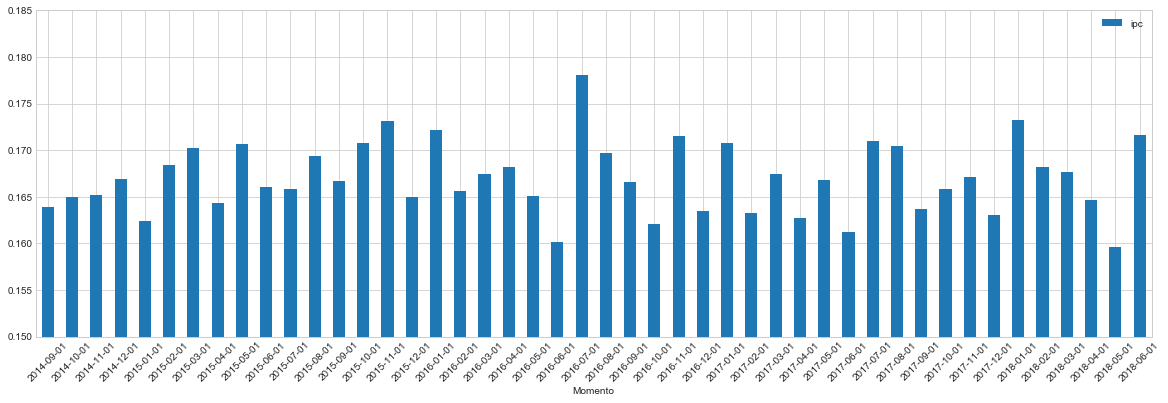

In [18]:
df_ipc_o.plot(kind='bar', figsize=(20, 6), rot=45, x="Momento", ylim=(0.15, 0.185))

### 5. IPC Puerto Varas

In [19]:
df_pvaras = df[(df.Sector=="Puerto Varas") & (df.Momento > base + "-01")]

In [20]:
df_pvaras.Sector.value_counts()

Puerto Varas    506
Name: Sector, dtype: int64

In [21]:
df_ipc_pv = GetIPC(df_pvaras, pb, df_w)

In [22]:
df_ipc_pv.head()

,Momento,ipc
0,2014-09-01,0.158482
1,2014-10-01,0.167828
2,2014-11-01,0.163989
3,2014-12-01,0.169855
4,2015-01-01,0.161568


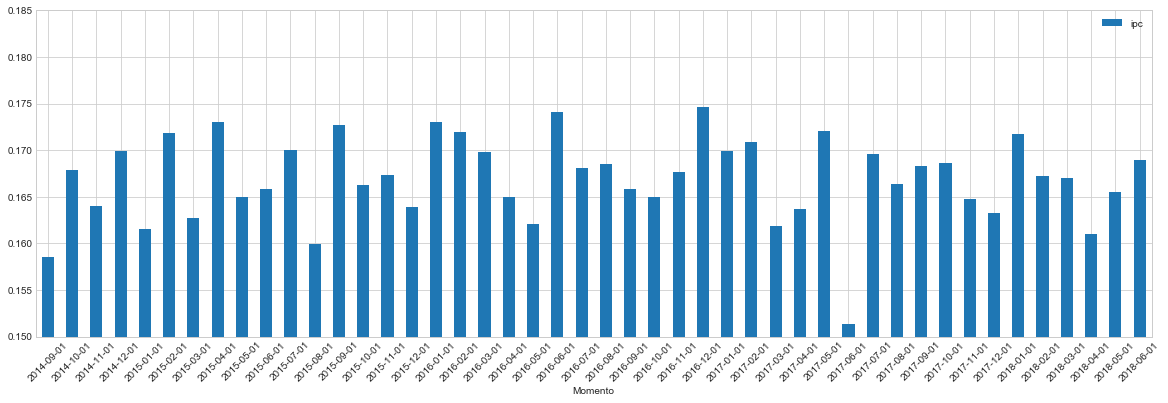

In [23]:
df_ipc_pv.plot(kind='bar', figsize=(20, 6), rot=45, x="Momento", ylim=(0.15, 0.185))

### 6. IPC Frutillar 

In [24]:
df_frutillar = df[(df.Sector=="Frutillar") & (df.Momento > base + "-01")]

In [25]:
df_frutillar.Sector.value_counts()

Frutillar    506
Name: Sector, dtype: int64

In [26]:
df_ipc_fru = GetIPC(df_frutillar, pb, df_w)

In [27]:
df_ipc_fru.head()

,Momento,ipc
0,2014-09-01,0.150957
1,2014-10-01,0.176805
2,2014-11-01,0.174068
3,2014-12-01,0.166861
4,2015-01-01,0.166861


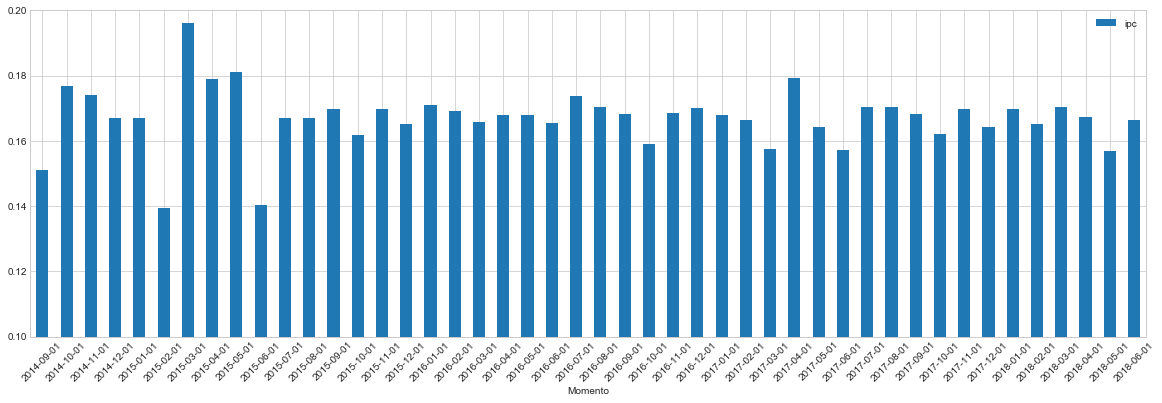

In [28]:
df_ipc_fru.plot(kind='bar', figsize=(20, 6), rot=45, x="Momento", ylim=(0.10, 0.2))

### 7. IPC Llanquihue 

In [29]:
df_llanquihue = df[(df.Sector=="Llanquihue") & (df.Momento > base + "-01")]

In [30]:
df_llanquihue.Sector.value_counts()

Llanquihue    506
Name: Sector, dtype: int64

In [31]:
df_ipc_lla = GetIPC(df_llanquihue, pb, df_w)

In [32]:
df_ipc_lla.head()

,Momento,ipc
0,2014-09-01,0.157679
1,2014-10-01,0.173846
2,2014-11-01,0.169483
3,2014-12-01,0.166861
4,2015-01-01,0.166861


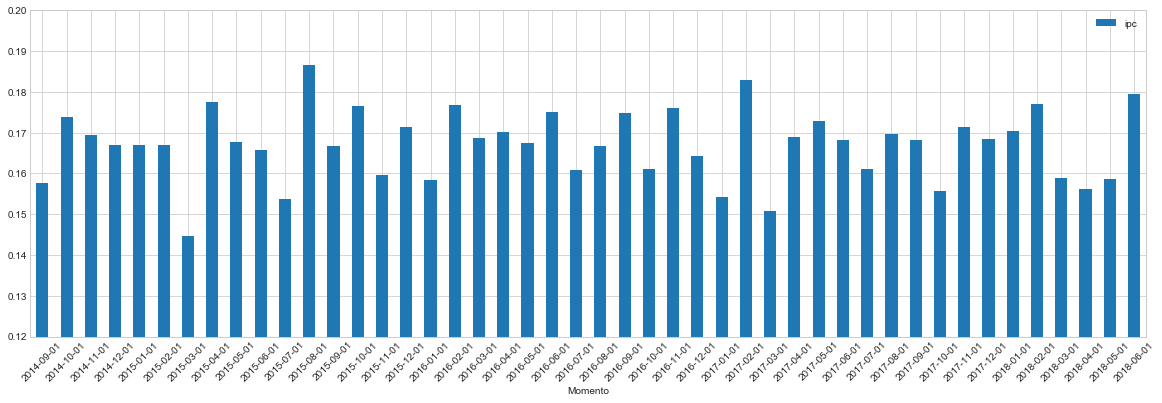

In [33]:
df_ipc_lla.plot(kind='bar', figsize=(20, 6), rot=45, x="Momento", ylim=(0.12, 0.2))

### 8. IPC Puerto Montt

In [34]:
df_pm = df[(df.Sector=="Puerto Montt") & (df.Momento > base + "-01")]

In [35]:
df_pm.Sector.value_counts()

Puerto Montt    506
Name: Sector, dtype: int64

In [36]:
df_ipc_pm = GetIPC(df_pm, pb, df_w)

In [37]:
df_ipc_pm.head()

,Momento,ipc
0,2014-09-01,0.169177
1,2014-10-01,0.168532
2,2014-11-01,0.159858
3,2014-12-01,0.168076
4,2015-01-01,0.163990


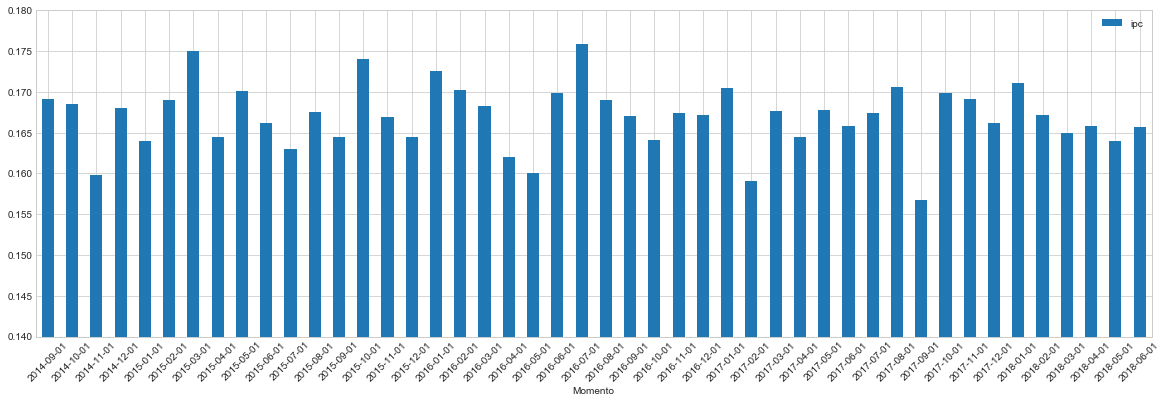

In [38]:
df_ipc_pm.plot(kind='bar', figsize=(20, 6), rot=45, x="Momento", ylim=(0.14, 0.18))

### 9 IPC Region de los Lagos

In [39]:
df_ipc_r = df_ipc_o
df_ipc_r = df_ipc_r.append(df_ipc_fru)
df_ipc_r = df_ipc_r.append(df_ipc_lla)
df_ipc_r = df_ipc_r.append(df_ipc_pm)
df_ipc_r = df_ipc_r.append(df_ipc_pv)

In [40]:
df_ipc_r.sample(10)

,Momento,ipc
38,2017-11-01,0.169180
27,2016-12-01,0.174652
39,2017-12-01,0.163035
18,2016-03-01,0.169836
30,2017-03-01,0.161886
37,2017-10-01,0.169914
40,2018-01-01,0.169706
22,2016-07-01,0.168123
22,2016-07-01,0.175883
20,2016-05-01,0.167971


In [41]:
df_ipc_t = df_ipc_r.groupby(["Momento"]).mean().reset_index()

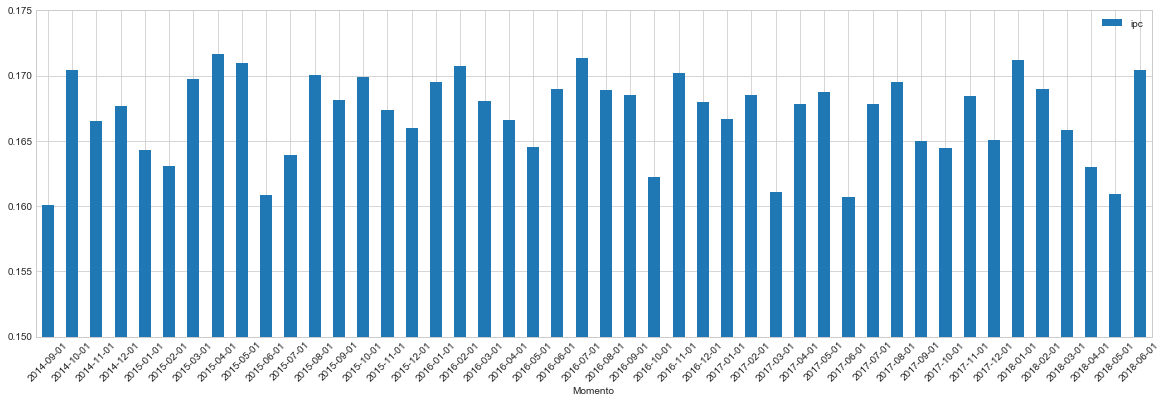

In [42]:
df_ipc_t.plot(kind='bar', figsize=(20, 6), rot=45, x="Momento", ylim=(0.15, 0.175))

In [43]:
df_ipc_t.head()

,Momento,ipc
0,2014-09-01,0.160047
1,2014-10-01,0.170396
2,2014-11-01,0.166521
3,2014-12-01,0.167701
4,2015-01-01,0.164333


In [44]:
df_ipc_t['ipcAcumulado'] = df_ipc_t.ipc.cumsum()

In [45]:
df_ipc_t.tail()

,Momento,ipc,ipcAcumulado
41,2018-02-01,0.168948,7.021914
42,2018-03-01,0.165797,7.187711
43,2018-04-01,0.163001,7.350713
44,2018-05-01,0.160952,7.511664
45,2018-06-01,0.170417,7.682081


In [46]:
df_ipc_t.head()

,Momento,ipc,ipcAcumulado
0,2014-09-01,0.160047,0.160047
1,2014-10-01,0.170396,0.330443
2,2014-11-01,0.166521,0.496964
3,2014-12-01,0.167701,0.664665
4,2015-01-01,0.164333,0.828998


**Vemos que el IPC acumulado para el periodo para la Región de los Lagos es 7.68%**

En el calculador en el [sitio web de la INE](http://encina.ine.cl/calculadora/) podemos ver que el IPC nacional para este periodo (y para la canasta completa) es un 13.2%

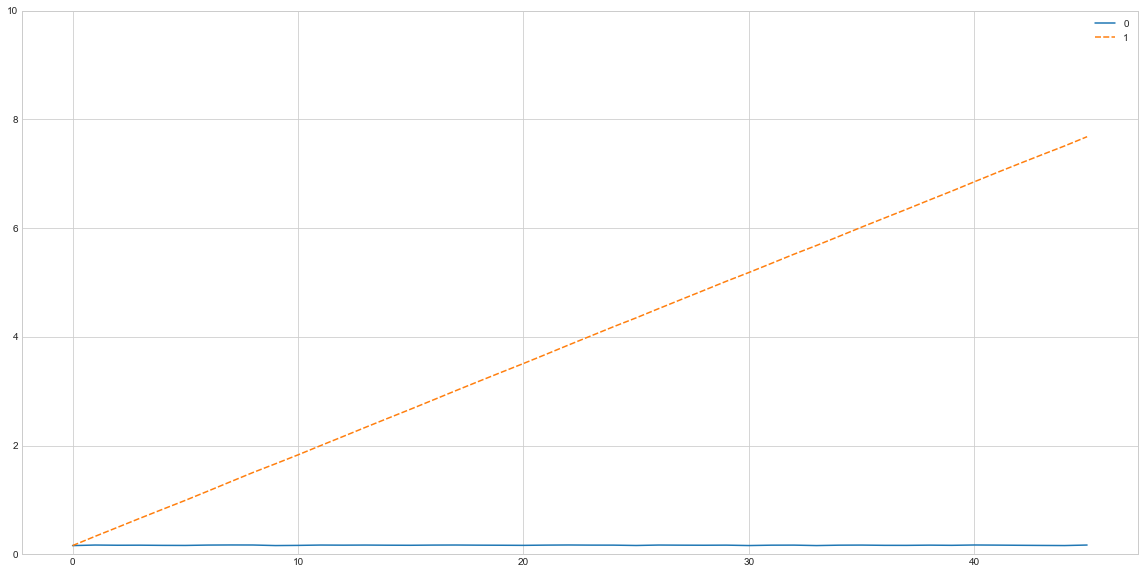

In [47]:
y1 = df_ipc_t.ipc
y2 = df_ipc_t.ipc.cumsum()

datos = pd.DataFrame(np.c_[y1, y2])

plt.figure(figsize=(20,10))

ax = sns.lineplot(data=datos)
plt.ylim(0,10)
plt.show()

### Exportar dataframes para analisis siguiente

In [49]:
df_ipc_o.to_csv('output/ipc_osorno.csv', index=None)
df_ipc_pv.to_csv('output/ipc_ptovaras.csv', index=None)
df_ipc_fru.to_csv('output/ipc_frutillar.csv', index=None)
df_ipc_lla.to_csv('output/ipc_llanquihue.csv', index=None)
df_ipc_pm.to_csv('output/ipc_ptomontt.csv', index=None)
df_ipc_t.to_csv('output/ipc_region.csv', index=None)